In [1]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = [
    "if you take the blue pill, the story ends",
    "if you take the red pill, you stay in Wonderland",
    "if you take the red pill, I show you how deep the rabbit hole goes",
]

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)


(3, 18)


In [4]:
feature_vect_dense = feature_vect_simple.todense()
print(feature_vect_dense.shape)

(3, 18)


In [8]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )

print(cos_similarity(vect1, vect2))
print(cos_similarity(vect1, vect3))
print(cos_similarity(vect2, vect3))

0.4020775821495014
0.40425044775948626
0.4564729602616639


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [10]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]


In [11]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [13]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = '../../../datasets/uci_opinion/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, '*.data'))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')

    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]

    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1, 2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/home/gw/anaconda3/envs/studying/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [14]:
document_df

,filename,opinion_text,cluster_label
0,food_swissotel_chicago,...,2
1,service_bestwestern_hotel_sfo,...,2
2,transmission_toyota_camry_2007,...,0
3,quality_toyota_camry_2007,...,0
4,battery-life_amazon_kindle,...,1
5,comfort_toyota_camry_2007,...,0
6,keyboard_netbook_1005ha,...,1
7,rooms_swissotel_chicago,...,2
8,gas_mileage_toyota_camry_2007,...,0
9,rooms_bestwestern_hotel_sfo,...,2


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

hotel_indexes = document_df[document_df['cluster_label'] == 1].index
print(hotel_indexes)

comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print(comparison_docname, ' 와 타 문서 유사도')

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

Int64Index([ 4,  6, 10, 12, 13, 16, 18, 19, 22, 23, 26, 27, 29, 30, 32, 33, 38,
            40, 42, 43, 44, 45, 49, 50],
           dtype='int64')
battery-life_amazon_kindle  와 타 문서 유사도
[[1.         0.12323469 0.05926201 0.03004155 0.03975485 0.03924845
  0.02470874 0.02271738 0.21594904 0.88509976 0.01240808 0.0505384
  0.14028442 0.10569832 0.096442   0.01718587 0.02086573 0.29855545
  0.1083282  0.18926406 0.20713047 0.79742523 0.0197642  0.03251715]]


Text(0.5, 1.0, 'battery-life_amazon_kindle')

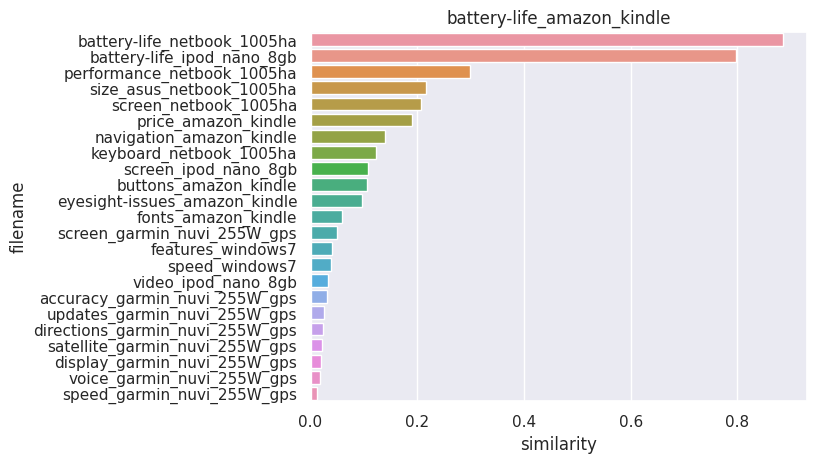

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)